Names: John Waldo, Adam Wolfson

Net Ids: jw922, amw337

CS 5785 HW 3 - 1

# (b)  Load the training set into a matrix X:  there are 540 training images in total, each has 50×50 pixels that need to be concatenated into a 2500-dimensional vector.  So the size of X shouldbe 540×2500, where each row is a flattened face image. Pick a face image from X and display that image in grayscale. Do the same thing for the test set. The size of matrix X_test for the testset should be 100×2500.

Initialize environment

In [6]:
import numpy as np
import imageio
      
from matplotlib import pylab as plt
import matplotlib.cm as cm
    

Helper function to load data

In [7]:
def load_data(file):
    train_labels, train_data = [], []

    for line in open(file):
        im = imageio.imread(line.strip().split()[0])
        train_data.append(im.reshape(2500,))
        train_labels.append(line.strip().split()[1])
    
    train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)
    
    return train_data, train_labels

    

Helper function to plot faces

In [34]:
def plot_face(data, title):
    plt.imshow(data.reshape(50,50), cmap = cm.Greys_r)
    plt.title(title)
    plt.show()
    

Load the train and test data

(540, 2500) (540,)


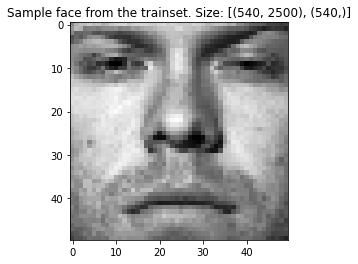

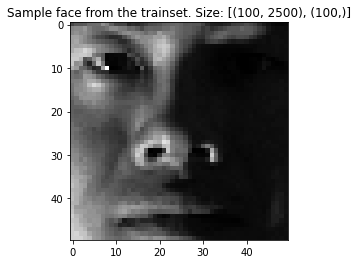

In [35]:

train_data, train_labels = load_data('./faces/train.txt')
test_data, test_labels = load_data('./faces/test.txt')

print(train_data.shape, train_labels.shape)
    
# Display train image
train_title = "Sample face from the trainset. Size: "
train_title += str([train_data.shape, train_labels.shape])

plot_face(train_data[10, :], train_title)
    
# Display test image
test_title = "Sample face from the trainset. Size: "
test_title += str([test_data.shape, test_labels.shape])

plot_face(test_data[10,:], test_title)

    

# (c)  Average Face. Compute the average face μ from the whole training set by summing up every column in X then dividing by the number of faces.  Display the average face as a grayscale image.

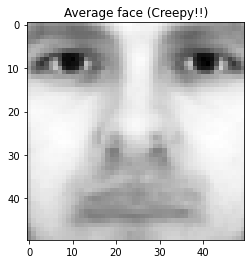

In [36]:
# Average over each feature in the train dataset
average_features = np.mean(train_data, axis = 0)

# Display average image
average_title = "Average face (Creepy!!)"
plot_face(average_features, average_title)



# (d)  Mean  Subtraction.   Subtract  average  face μ from  every  column  in X. That  is, x_i := x_i−μ, where x_i is the i-th column of X.  Pick a face image after mean subtraction from the new X and display that image in grayscale.  Do the same thing for the test set X_test using the pre-computed average face μ in (c).

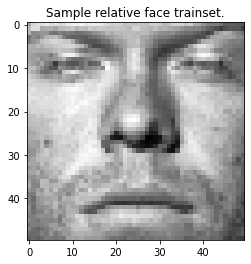

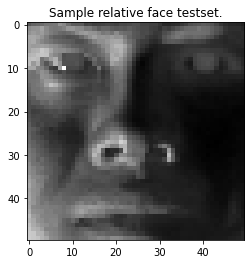

In [38]:

relative_train_data = train_data - average_features
relative_test_data = test_data - average_features

# Display train image
train_title = "Sample relative face trainset."
plot_face(relative_train_data[10,:], train_title)

# Display test image
test_title = "Sample relative face testset."
plot_face(relative_test_data[10,:], test_title)

# (e)  Eigenface.  Perform Singular Value Decomposition (SVD) on training set X(X=UΣV^T) to get matrix V^T, where each row of V^T has the same dimension as the face image.  We refer to v_i, the i-th row of V^T, as i-th eigenface. Display the first 10 eigenfaces as 10 images in grayscale.

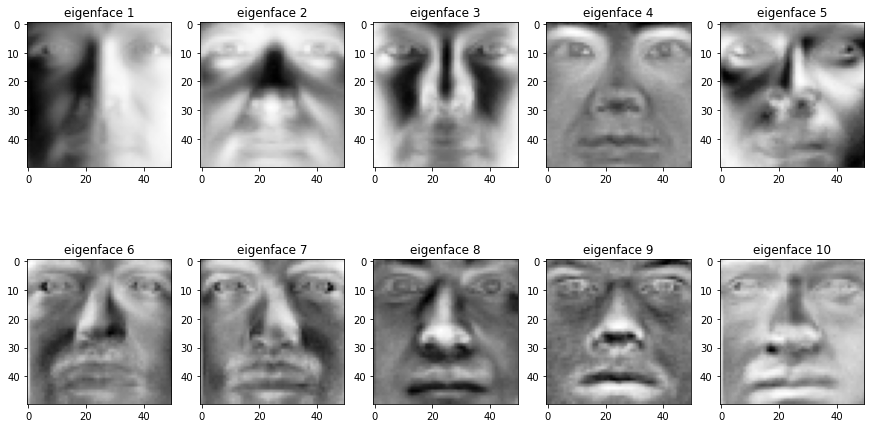

In [65]:
# Decompose train data
u, s, vt = np.linalg.svd(train_data, full_matrices=True)

# for row in range(10):
#     eigen_face_title = str(row) + "-th eigenface"
#     plot_face(vt[row,:], eigen_face_title)
    
fig = plt.figure(figsize=(15, 8))
columns = 5
rows = 2

ax = []

for i in range(1, columns*rows +1):
    face_title = "eigenface " + str(i)
    ax.append(fig.add_subplot(rows, columns, i))
    ax[-1].set_title(face_title)  # set title
    plt.imshow(vt[i,:].reshape(50,50), cmap = cm.Greys_r)

    
plt.show()
    
    

# (f )  Low-rank Approximation.  Since Σ is a diagonal matrix with non-negative real numbers on the diagonal in non-ascending order, we can use the first r elements in Σ together with first r columns in U and first r rows in V^T to approximate X.  That is, we can approximate X by ˆX_r = U[:, :r] * Σ[:r, :r] * V^T[:r, :].  The matrix ˆXr is called rank-rapproximation of X.  Plot the rank-r approximation error ‖X−ˆX_r‖F3 as a function of r when r=1, 2, . . . , 200.

In [84]:
def get_frobenious_norm(data, r, svd_parts):
    u, s, vt = svd_parts
    u_r = u[:,:r]
    s_r = np.diag(s)[:r, :r]
    vt_r = vt[:r, :]
    
    data_r = np.dot(np.dot(u_r,s_r),vt_r)
    
    data_diff = data - data_r
    
    frob_norm = np.linalg.norm(data_diff, ord = 'fro')

    return frob_norm

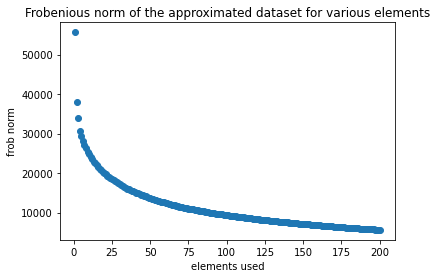

In [112]:
svd_parts = np.linalg.svd(train_data, full_matrices=True)
top_r = 200
rs = [r+1 for r in range(top_r)]
norms = [get_frobenious_norm(train_data,r,svd_parts) for r in rs]

plt.scatter(rs, norms)
plt.title("Frobenious norm of the approximated dataset for various elements")
plt.ylabel("frob norm")
plt.xlabel("elements used")
plt.show()

# (g)  Eigenface  Feature.   The  top r eigenfaces V^T[:r, :] = {v1,v2, . . . ,v_r}^T span an r-dimensional linear subspace of the original image space called face space, whose origin is the average face μ,  and whose axes are the eigenfaces {v1,v2, . . . ,vr}.   Therefore,  using the top r eigenfaces {v1,v2, . . . ,v_r}, we can represent a 2500-dimensional face image z as an r-dimensional feature vector f:f = V^T[:r, :] z = [v1,v2, . . . ,vr]^T z.  Write a function to generate r-dimensional feature matrix F and F_test for training images X and test images X_test, respectively (to get F, multiply X to the transpose of first r rows of V^T, F should have same number of rows as X and r columns; similarly for X test).

In [105]:
def transform_eigen_feature(data, r, svd_parts):
    u, s, vt = svd_parts
    vt_r = vt[:r, :]
    
    reduced_data = np.dot(data, np.transpose(vt_r))
    

    return reduced_data

In [110]:
# Get parts of SVD of train_data
svd_parts = np.linalg.svd(train_data, full_matrices=True)

# Transform both datasets to r features
r = 10
eigen_train_data = transform_eigen_feature(train_data, r, svd_parts)
eigen_test_data = transform_eigen_feature(test_data, r, svd_parts)

print("The size of the train data is " + str(eigen_train_data.shape))
print("The size of the test data is " + str(eigen_test_data.shape))


The size of the train data is (540, 10)
The size of the test data is (100, 10)


# (h)  Face Recognition.  Extract training and test features for r=10.  Train a Logistic Regression model using F and test on F_test.  Report the classification accuracy on the test set.  Plot the classification accuracy on the test set as a function of r when r = 1, 2, . . . , 200.  Use “one-vs-rest”  logistic  regression,  where a classifier is trained for each possible output  label. Each classifier is trained on faces with that label as positive data and all faces with other labels as negative data. sklearn calls this “ovr” mode.

At r = 10, 
	 the accuracy for the OvR Logistic Model is 0.81
	 the accuracy for the OvR Ridge CV Model is 0.64

At r = 48, 
	 the accuracy for the OvR Logistic Model is 0.94
	 the accuracy for the OvR Ridge CV Model is 0.91

At r = 96, 
	 the accuracy for the OvR Logistic Model is 0.91
	 the accuracy for the OvR Ridge CV Model is 0.98



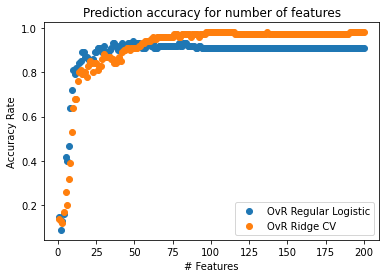

In [146]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeCV

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

top_r = 200
rs = [r+1 for r in range(top_r)]


# relative_train_data = train_data - average_features
# relative_test_data = test_data - average_features

# Get parts of SVD of train_data
svd_parts = np.linalg.svd(train_data, full_matrices=True)

acc_rates = []
ridge_rates = []

for r in rs:
    eigen_train_data = transform_eigen_feature(train_data, r, svd_parts)
    eigen_test_data = transform_eigen_feature(test_data, r, svd_parts)

    
    # Create a one vs rest classifier with logistic regression
    ovr_model = OneVsRestClassifier(LogisticRegression())
    ovr_model.fit(eigen_train_data, train_labels)
    
    ridge_model = OneVsRestClassifier(RidgeCV(cv = 2))
    ridge_model.fit(eigen_train_data, train_labels)
    
    # Get the accuracy rate of the test set
    preds = ovr_model.predict(eigen_test_data)
    accuracy = preds == test_labels
    acc_rate = np.average(accuracy)
    
    ridge_preds = ridge_model.predict(eigen_test_data)
    ridge_rate = np.average(ridge_preds == test_labels)
    
    acc_rates.append(acc_rate)
    ridge_rates.append(ridge_rate)
    
    if r == 10:
        print("At r = 10, ")
        print("\t the accuracy for the OvR Logistic Model is " + str(acc_rate))
        print("\t the accuracy for the OvR Ridge CV Model is " + str(ridge_rate))
        print("")
        
max_reg = np.argmax(acc_rates)
print("At r = "+ str(max_reg) +", ")
print("\t the accuracy for the OvR Logistic Model is " + str(acc_rates[max_reg]))
print("\t the accuracy for the OvR Ridge CV Model is " + str(ridge_rates[max_reg]))
print("")

max_ridge = np.argmax(ridge_rates)
print("At r = "+ str(max_ridge) +", ")
print("\t the accuracy for the OvR Logistic Model is " + str(acc_rates[max_ridge]))
print("\t the accuracy for the OvR Ridge CV Model is " + str(ridge_rates[max_ridge]))
print("")
        

plt.scatter(rs, acc_rates, label = 'OvR Regular Logistic')
plt.scatter(rs, ridge_rates, label = 'OvR Ridge CV')
plt.legend()
plt.ylabel("Accuracy Rate")
plt.xlabel("# Features")
plt.title("Prediction accuracy for number of features")
plt.show()


We notice from the charts above that since PCA is extracting the r most important basises, that at low r we dont want to incorporate Ridge penalties and limit these features. However, if we increase r and allow for a greater number of features, each successive feature may be a little less important or have a bit more noise for which adding a Ridge penalty is helpful. However, for both models we see that there is still a platau for the number of features after which we are only adding complexity n